In [1]:
from sympy import *
x, y, z = symbols('x y z')
expr = sin(ln(x+1)**2)
expr.series(x, 0, 5)

x**2 - x**3 + 11*x**4/12 + O(x**5)

In [2]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
# from graphviz import Source, render
# import os

n1 = Node('1')
n2 = Node('2', parent=n1)
n3 = Node('3', parent=n1)
n4 = Node('4', parent=n2)
n5 = Node('5', parent=n3)
n6 = Node('6', parent=n3)
n7 = Node('7', parent=n3)
print(RenderTree(n1))
DotExporter(n1).to_dotfile('simple_tree.dot')

#Source.from_file('simple_tree.dot')

#render('dot','png', 'simple_tree.dot')

Node('/1')
├── Node('/1/2')
│   └── Node('/1/2/4')
└── Node('/1/3')
    ├── Node('/1/3/5')
    ├── Node('/1/3/6')
    └── Node('/1/3/7')


In [3]:
import igraph as ig

graph = ig.Graph(directed=True)
graph.add_vertices(5)

for i in range(len(graph.vs)):
    graph.vs[i]['id'] = i
    graph.vs[i]['label'] = str(i)

graph.add_edges([(1,2), (3,4)])
weights = [8, 7]
graph.es['weight'] = weights
graph.es['label'] = weights

In [4]:
# ig.plot(graph)
# len(graph.es)
graph

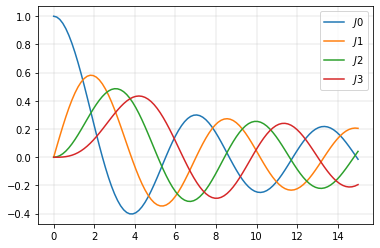

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

J0 = lambda t: besselj(0, t)
J1 = lambda t: besselj(1, t)
J2 = lambda t: besselj(2, t)
J3 = lambda t: besselj(3, t)

time = np.linspace(0,15,101)
J0 = np.array([N(J0(i)) for i in time])
J1 = np.array([N(J1(i)) for i in time])
J2 = np.array([N(J2(i)) for i in time])
J3 = np.array([N(J3(i)) for i in time])

plt.plot(time, J0, label='$J0$')
plt.plot(time, J1, label='$J1$')
plt.plot(time, J2, label='$J2$')
plt.plot(time, J3, label='$J3$')

plt.legend()
plt.grid(linewidth=0.3)

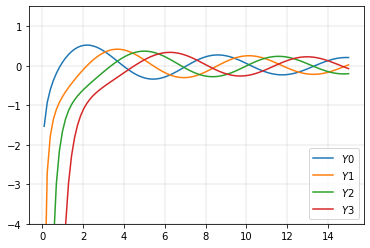

In [6]:
Y0 = lambda t: bessely(0, t)
Y1 = lambda t: bessely(1, t)
Y2 = lambda t: bessely(2, t)
Y3 = lambda t: bessely(3, t)

time = np.linspace(0.1,15,101)
Y0 = np.array([N(Y0(i)) for i in time])
Y1 = np.array([N(Y1(i)) for i in time])
Y2 = np.array([N(Y2(i)) for i in time])
Y3 = np.array([N(Y3(i)) for i in time])

plt.plot(time, Y0, label='$Y0$')
plt.plot(time, Y1, label='$Y1$')
plt.plot(time, Y2, label='$Y2$')
plt.plot(time, Y3, label='$Y3$')
plt.ylim(-4,1.5)

plt.legend()
plt.grid(linewidth=0.3)


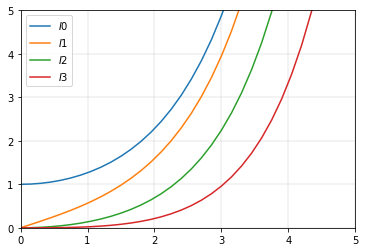

In [7]:
I0 = lambda t: besseli(0, t)
I1 = lambda t: besseli(1, t)
I2 = lambda t: besseli(2, t)
I3 = lambda t: besseli(3, t)

time = np.linspace(0,15,101)
I0 = np.array([N(I0(i)) for i in time])
I1 = np.array([N(I1(i)) for i in time])
I2 = np.array([N(I2(i)) for i in time])
I3 = np.array([N(I3(i)) for i in time])

plt.plot(time, I0, label='$I0$')
plt.plot(time, I1, label='$I1$')
plt.plot(time, I2, label='$I2$')
plt.plot(time, I3, label='$I3$')
plt.xlim(0,5)
plt.ylim(0,5)

plt.legend()
plt.grid(linewidth=0.3)

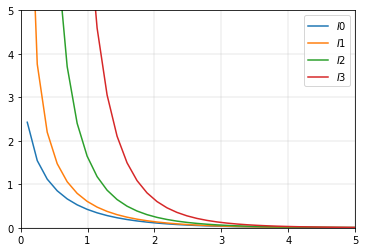

In [8]:
K0 = lambda t: besselk(0, t)
K1 = lambda t: besselk(1, t)
K2 = lambda t: besselk(2, t)
K3 = lambda t: besselk(3, t)

time = np.linspace(0.1,15,101)
K0 = np.array([N(K0(i)) for i in time])
K1 = np.array([N(K1(i)) for i in time])
K2 = np.array([N(K2(i)) for i in time])
K3 = np.array([N(K3(i)) for i in time])

plt.plot(time, K0, label='$I0$')
plt.plot(time, K1, label='$I1$')
plt.plot(time, K2, label='$I2$')
plt.plot(time, K3, label='$I3$')
plt.xlim(0,5)
plt.ylim(0,5)

plt.legend()
plt.grid(linewidth=0.3)